In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Preprocessing and EDA

In [2]:
df = pd.read_csv('cardata.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
print (df.Car_Name)

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [13]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [14]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

In [15]:
df.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [16]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


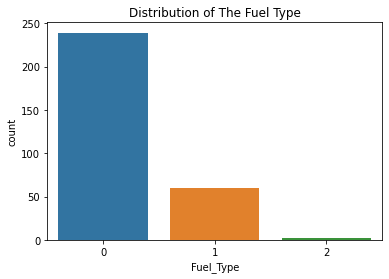

In [17]:
sns.countplot(x='Fuel_Type', data =df)
plt.title("Distribution of The Fuel Type")
plt.show()

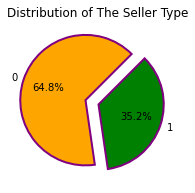

In [18]:
fig = plt.figure(figsize=(5,3))
colors = ("orange", "green")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.Seller_Type.value_counts()
explode = (0.2, 0.01)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=45,
          wedgeprops = wp, label='', explode = explode)
plt.title("Distribution of The Seller Type")
plt.show()

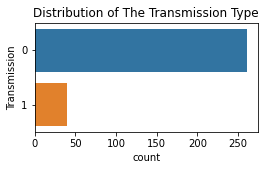

In [19]:
fig = plt.figure(figsize=(4,2))   
sns.countplot(y='Transmission', data=df)
plt.title("Distribution of The Transmission Type")
plt.show()

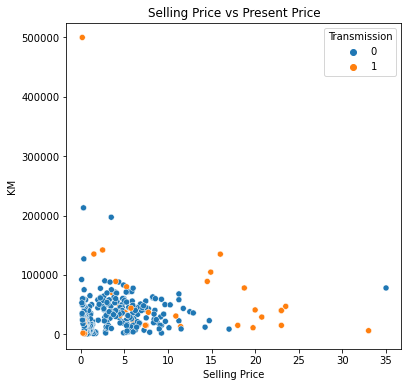

In [20]:
plt.figure(figsize=(6,6))
plt.title('Selling Price vs Present Price')
sns.scatterplot(x=df['Selling_Price'],y=df['Kms_Driven'], hue=df['Transmission'])
plt.xlabel('Selling Price')
plt.ylabel('KM')
plt.show()

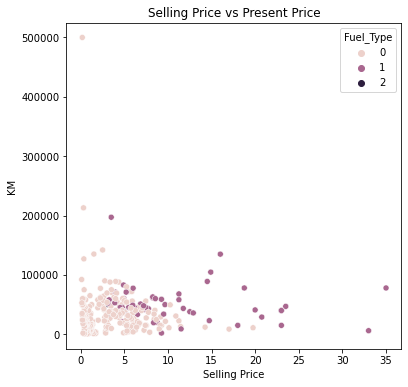

In [21]:
plt.figure(figsize=(6,6))
plt.title('Selling Price vs Present Price')
sns.scatterplot(x=df['Selling_Price'],y=df['Kms_Driven'], hue=df['Fuel_Type'])
plt.xlabel('Selling Price')
plt.ylabel('KM')
plt.show()

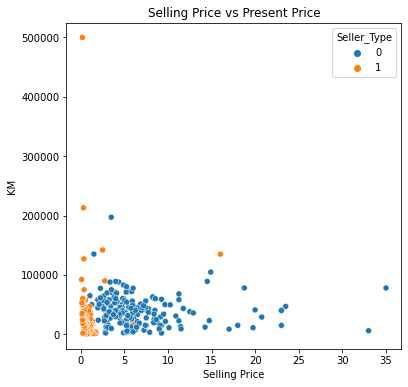

In [22]:
plt.figure(figsize=(6,6))
plt.title('Selling Price vs Present Price')
sns.scatterplot(x=df['Selling_Price'],y=df['Kms_Driven'], hue=df['Seller_Type'])
plt.xlabel('Selling Price')
plt.ylabel('KM')
plt.show()

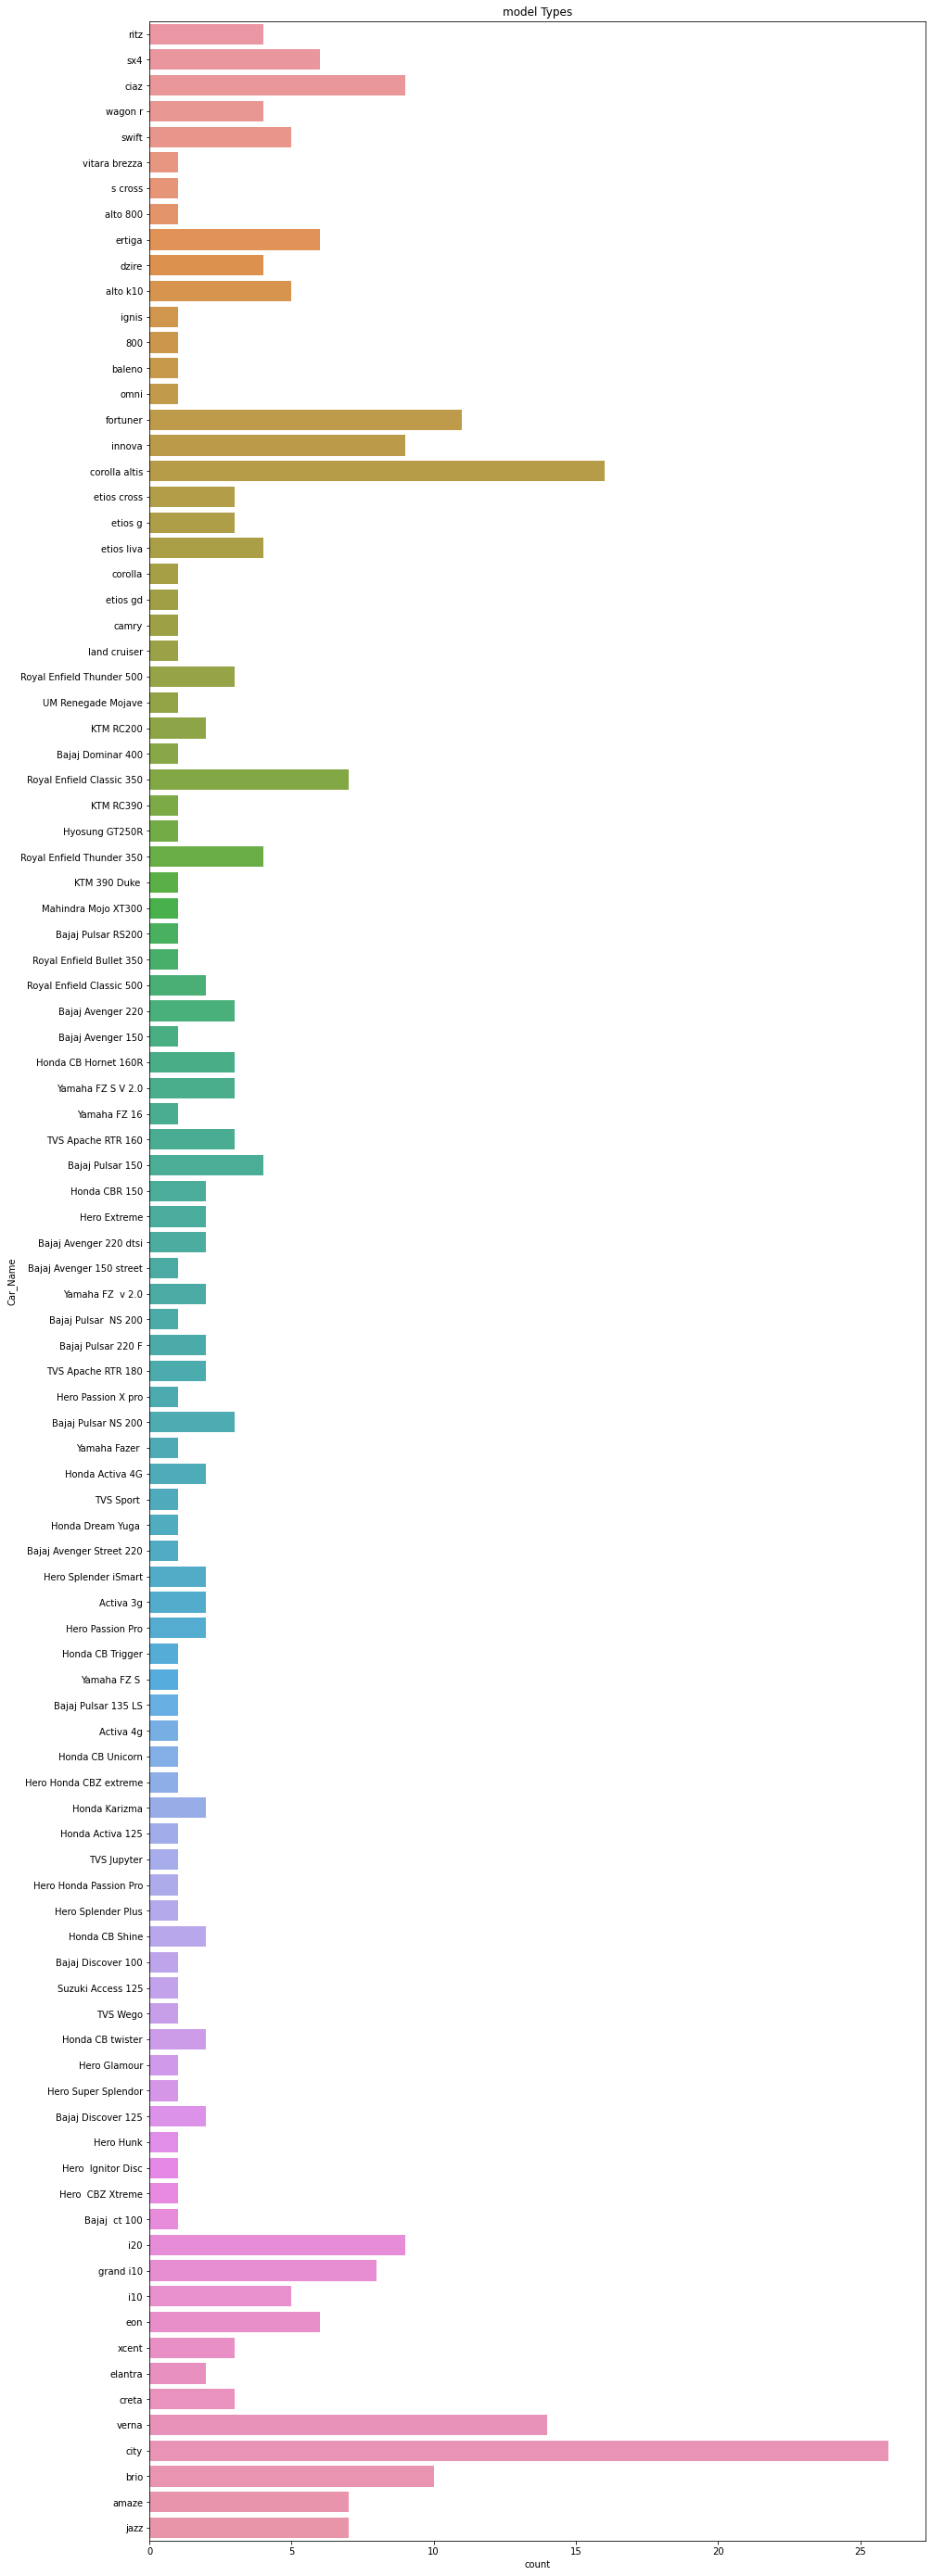

In [23]:
plt.figure(figsize=(15,50))
sns.countplot(y='Car_Name', data=df)
plt.title('model Types')
plt.show()

In [24]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

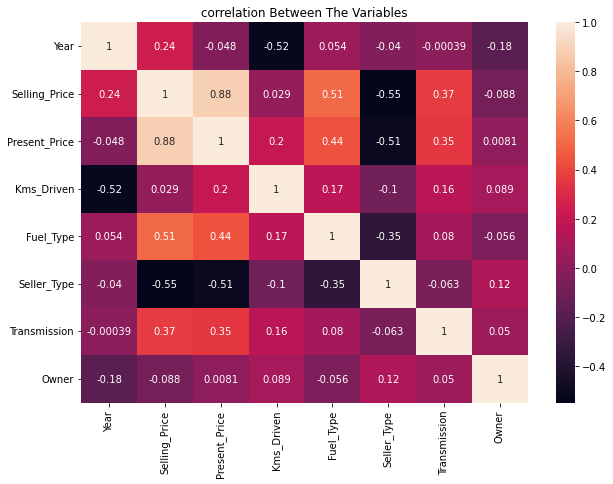

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('correlation Between The Variables')
plt.show()

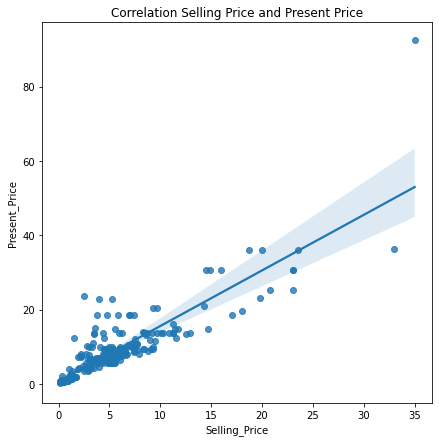

In [26]:
fig = plt.figure(figsize=(7,7))
plt.title('Correlation Selling Price and Present Price')
sns.regplot(x='Selling_Price', y='Present_Price', data=df)
plt.show()

In [27]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df.Selling_Price

In [28]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

Model Training

In [32]:
linreg = LinearRegression()

In [33]:
linreg.fit(x_train, y_train)

LinearRegression()

In [34]:
training_data_prediction = linreg.predict(x_train)

In [36]:
err_score = metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error :", err_score)

R Squared Error : 0.8838169193709796


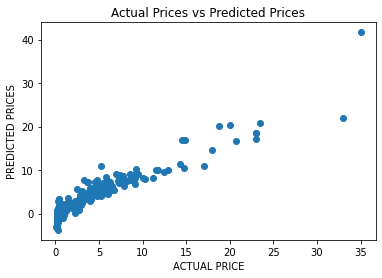

In [38]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [39]:
test_data_prediction = linreg.predict(x_test)

In [40]:
err_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error :", err_score)

R Squared Error : 0.8401532365377784


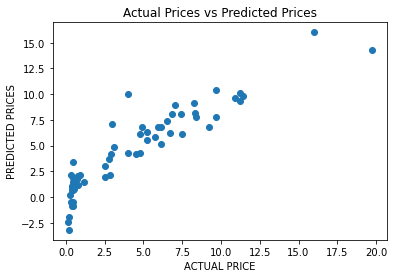

In [41]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

R Squared Error : 0.8838169193709796


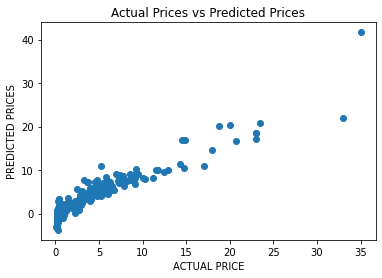

In [42]:
lassreg = Lasso()
linreg.fit(x_train, y_train)
training_data_prediction = linreg.predict(x_train)
err_score = metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error :", err_score)
plt.scatter(y_train, training_data_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

R Squared Error : 0.8401532365377784


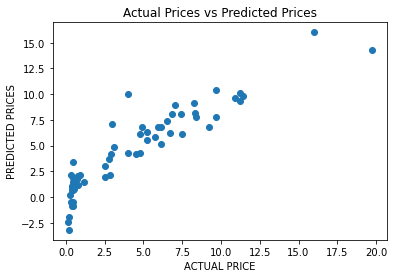

In [43]:
test_data_prediction = linreg.predict(x_test)
err_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error :", err_score)
plt.scatter(y_test, test_data_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICES')
plt.title('Actual Prices vs Predicted Prices')
plt.show()